In [7]:
import json
import os
import numpy as np
import itertools

from transformers import PreTrainedTokenizerFast, AutoTokenizer, AutoConfig
from transformers import XLMRobertaTokenizerFast
from matplotlib import pyplot as plt
import seaborn as sns

In [8]:
from notebook_utils import *

# Load the results for down-stream NER + POS (cross-lingual transfer)

In [23]:
result_dir = "/home/limisiewicz/my-luster/entangled-in-scripts/models"

languages = ('ar', 'tr', 'zh','el', 'es', 'en')
#alphas = (0.25, 0.5, 0.75, 1.0)
alphas = (0.25, 1.0)

baselines = ('multilingual','nooverlap', 'merged', 'xlmr')

### Collect NER results

In [10]:
task = 'NER'
post_training = 'PROBE'
metric = 'f1-macro' if task == 'NER' else 'accuracy'




In [11]:
ner_results = {}

for lang_src in languages:
    ner_results[lang_src] = {}
    for lang_tgt in languages:
        ner_results[lang_src][lang_tgt] = []
        for alpha in alphas:

            result_file = f"{result_dir}/{task}_{post_training}/multilingual-tokenization/alpha-{alpha}_alpha-train-0.25_N-120000_1234/{lang_src}/{metric}_evaluation/{lang_tgt}/{metric}_all.txt"
            
            with open(result_file, 'r') as in_file:
                res = json.load(in_file)[f'eval_{metric}']
                
            ner_results[lang_src][lang_tgt].append(res)

In [12]:
ner_results_baselines = {}

for lang_src in languages:
    ner_results_baselines[lang_src] = {}
    for lang_tgt in languages:
        ner_results_baselines[lang_src][lang_tgt] = {}
        for baseline in baselines:
            
            ner_results_baselines[lang_src][lang_tgt][baseline] = []
            for alpha in alphas:
                if baseline == 'nooverlap':
                    result_file = f"{result_dir}/{task}_{post_training}/{baseline}-tokenization/alpha-{alpha}_alpha-train-0.25_N-20000_1234/{lang_src}/{metric}_evaluation/{lang_tgt}/{metric}_all.txt"
                elif baseline == 'xlmr':
                    result_file = f"{result_dir}/{task}_{post_training}/{baseline}-tokenization/alpha-0.25_alpha-train-0.25_N-250002_1234/{lang_src}/{metric}_evaluation/{lang_tgt}/{metric}_all.txt"
                else:
                    result_file = f"{result_dir}/{task}_{post_training}/{baseline}-tokenization/alpha-{alpha}_alpha-train-0.25_N-120000_1234/{lang_src}/{metric}_evaluation/{lang_tgt}/{metric}_all.txt"

                with open(result_file, 'r') as in_file:
                    res = json.load(in_file)[f'eval_{metric}']

                ner_results_baselines[lang_src][lang_tgt][baseline].append(res)

### Collect POS results

In [13]:
task = 'POS'
post_training = 'PROBE'
metric = 'f1-macro' if task == 'NER' else 'accuracy'

pos_results = {}

for lang_src in languages:
    pos_results[lang_src] = {}
    for lang_tgt in languages:
        pos_results[lang_src][lang_tgt] = []
        for alpha in alphas:

            result_file = f"{result_dir}/{task}_{post_training}/multilingual-tokenization/alpha-{alpha}_alpha-train-0.25_N-120000_1234/{lang_src}/{metric}_evaluation/{lang_tgt}/{metric}_all.txt"
            
            with open(result_file, 'r') as in_file:
                res = json.load(in_file)[f'eval_{metric}']
                
            pos_results[lang_src][lang_tgt].append(res)

In [14]:
pos_results_baselines = {}

for lang_src in languages:
    pos_results_baselines[lang_src] = {}
    for lang_tgt in languages:
        pos_results_baselines[lang_src][lang_tgt] = {}
        for baseline in ('nooverlap', 'merged', 'multilingual', 'xlmr'):
            pos_results_baselines[lang_src][lang_tgt][baseline] = []
            for alpha in alphas:
                if baseline == 'nooverlap':
                    result_file = f"{result_dir}/{task}_{post_training}/{baseline}-tokenization/alpha-{alpha}_alpha-train-0.25_N-20000_1234/{lang_src}/{metric}_evaluation/{lang_tgt}/{metric}_all.txt"
                elif baseline == 'xlmr':
                    result_file = f"{result_dir}/{task}_{post_training}/{baseline}-tokenization/alpha-0.25_alpha-train-0.25_N-250002_1234/{lang_src}/{metric}_evaluation/{lang_tgt}/{metric}_all.txt"
                else:
                    result_file = f"{result_dir}/{task}_{post_training}/{baseline}-tokenization/alpha-{alpha}_alpha-train-0.25_N-120000_1234/{lang_src}/{metric}_evaluation/{lang_tgt}/{metric}_all.txt"
        
                with open(result_file, 'r') as in_file:
                    res = json.load(in_file)[f'eval_{metric}']


                pos_results_baselines[lang_src][lang_tgt][baseline].append(res)

# Plot in-lang results

In [15]:
def plot_baslines(axes, lang_baseline_data, ylabel):
    languages = ('ar', 'tr', 'zh','el', 'es', 'en')
    baselines = ('multilingual','nooverlap', 'merged', 'xlmr')
    colors= ["C1", "C2", "C3", "C4", "C5", "C6"]
    markers=['', 'o', 'v', 'X']
    styles=['-', ':', '-.', '']

    for bl_idx, baseline in enumerate(baselines): 
        for lang_idx, lang in enumerate(languages):
            axes.plot(alphas, lang_baseline_data[lang][baseline], color=colors[lang_idx],
                      marker=markers[bl_idx], ls=styles[bl_idx], alpha=0.6)


    dummy_lines = []
    for m_idx in range(len(markers)):
        dummy_lines.append(axes.plot([],[], c="black", ls=styles[m_idx], marker = markers[m_idx], alpha=0.6)[0])
    lines = axes.get_lines()
    legend1 = axes.legend([lines[i] for i in range(len(colors))], languages, loc='upper center', ncol=6)
    legend2 = axes.legend([dummy_lines[i] for i in range(len(markers))], baselines, loc='lower center', ncol=6)
    axes.add_artist(legend1)
    axes.set_xlabel("Alpha")
    axes.set_ylabel(ylabel)

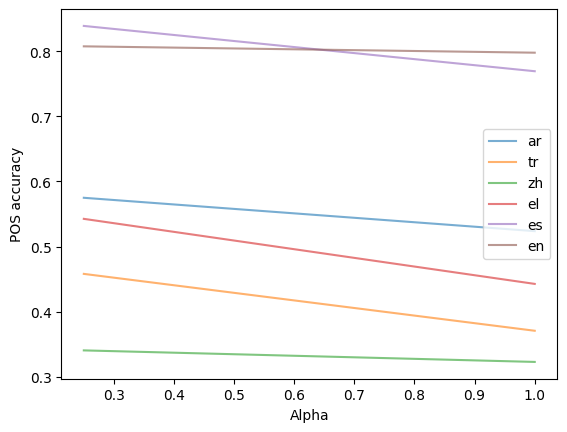

In [16]:
plt.figure()

for lang in languages:
    plt.plot(alphas, pos_results[lang][lang], label=lang, alpha=0.6)
    
plt.xlabel("Alpha")
plt.ylabel("POS accuracy")
plt.legend()

(0.2, 1.0)

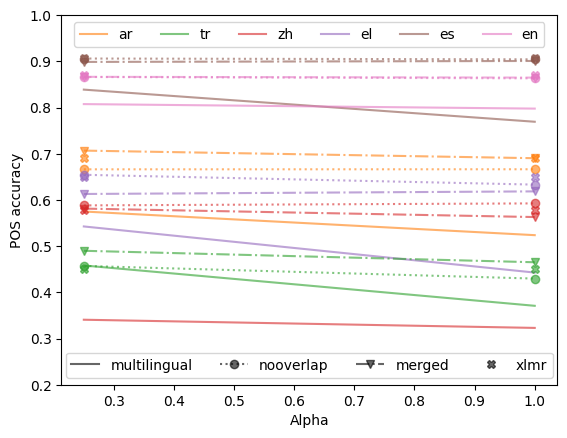

In [17]:
fig, axes = plt.subplots()

plot_baslines(axes,
             {lang: { baseline: pos_results_baselines[lang][lang][baseline]
                     for baseline in baselines}
              for lang in languages},
              "POS accuracy")

axes.set_ylim([0.2,1.])

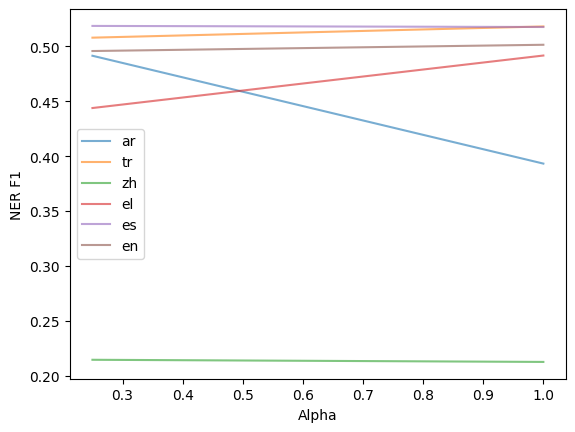

In [18]:
plt.figure()

for lang in languages:
    plt.plot(alphas, ner_results[lang][lang], label=lang, alpha=0.6)
    
plt.xlabel("Alpha")
plt.ylabel("NER F1")
plt.legend()

(0.2, 0.7)

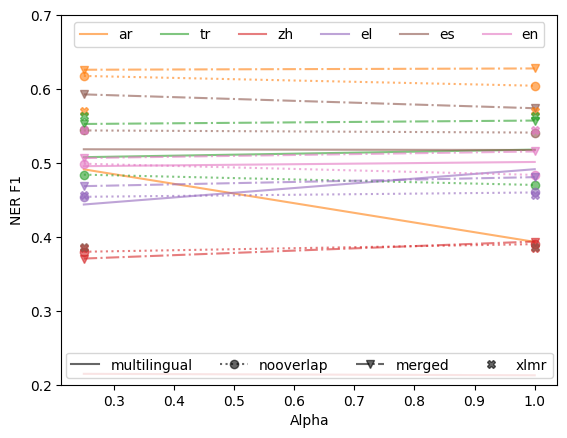

In [19]:
fig, axes = plt.subplots()

plot_baslines(axes,
             {lang: { baseline: ner_results_baselines[lang][lang][baseline]
                     for baseline in baselines}
              for lang in languages},
              "NER F1")

axes.set_ylim([0.2, .7])

# Plot cross-lang (per each source)

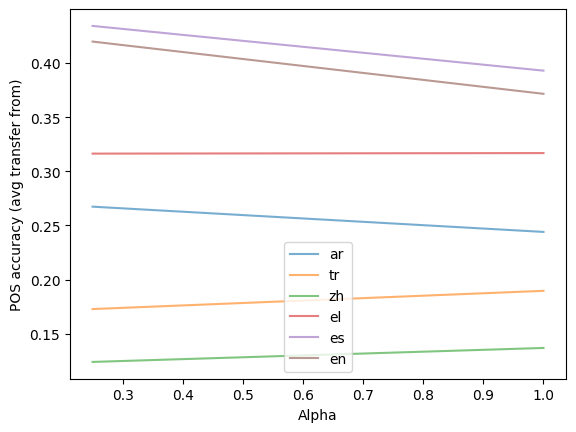

In [20]:
plt.figure()

for lang in languages:
    
    transfers_from = np.mean([pos_results[lang][tgt_lang] for tgt_lang in languages if lang != tgt_lang], axis=0)
    plt.plot(alphas, transfers_from, label=lang, alpha=0.6)
    
plt.xlabel("Alpha")
plt.ylabel("POS accuracy (avg transfer from)")
plt.legend()

(0.1, 0.55)

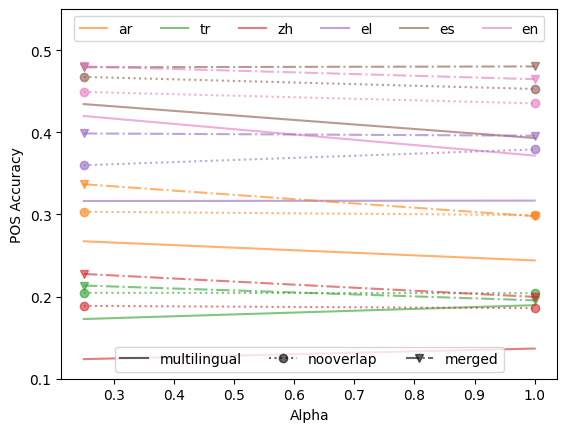

In [54]:
fig, axes = plt.subplots()

plot_baslines(axes,
             {lang: { baseline: np.mean([pos_results_baselines[lang][tgt_lang][baseline] 
                                         for tgt_lang in languages if lang != tgt_lang], axis=0)
                     for baseline in baselines}
              for lang in languages},
              "POS Accuracy")

axes.set_ylim([0.1,0.55])

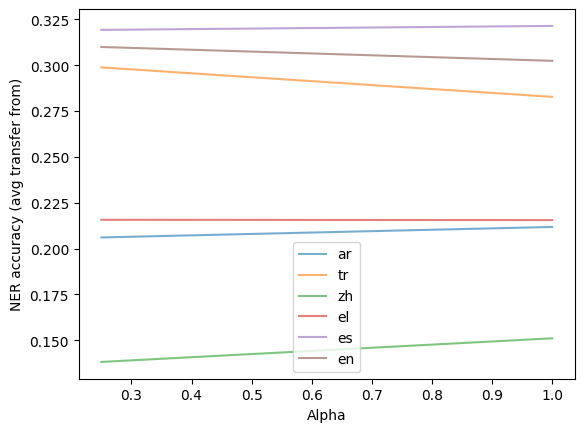

In [21]:
plt.figure()

for lang in languages:
    
    transfers_from = np.mean([ner_results[lang][tgt_lang] for tgt_lang in languages if lang != tgt_lang], axis=0)
    plt.plot(alphas, transfers_from, label=lang, alpha=0.6)
    
plt.xlabel("Alpha")
plt.ylabel("NER accuracy (avg transfer from)")
plt.legend()

(0.2, 0.4)

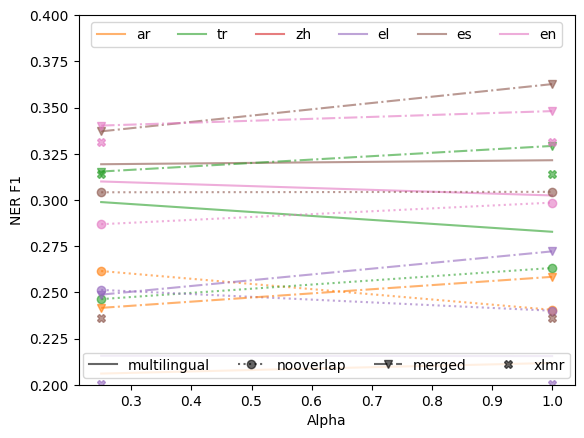

In [22]:
fig, axes = plt.subplots()

plot_baslines(axes,
             {lang: { baseline: np.mean([ner_results_baselines[lang][tgt_lang][baseline] 
                                         for tgt_lang in languages if lang != tgt_lang], axis=0)
                     for baseline in baselines}
              for lang in languages},
              "NER F1")

axes.set_ylim([0.2, .4])

# Plot cross-lang (per each target)

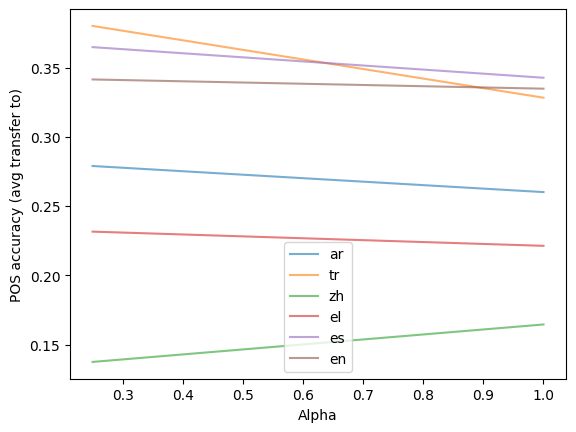

In [56]:
plt.figure()

for lang in languages:
    
    transfers_to = np.mean([pos_results[src_lang][lang] for src_lang in languages if lang != src_lang], axis=0)
    plt.plot(alphas, transfers_to, label=lang, alpha=0.6)
    
plt.xlabel("Alpha")
plt.ylabel("POS accuracy (avg transfer to)")
plt.legend()

(0.1, 0.5)

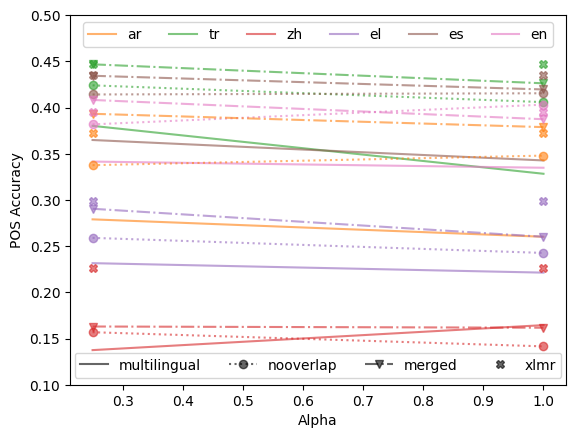

In [25]:
fig, axes = plt.subplots()

plot_baslines(axes,
             {lang: { baseline: np.mean([pos_results_baselines[src_lang][lang][baseline] 
                                         for src_lang in languages if lang != src_lang], axis=0)
                     for baseline in baselines}
              for lang in languages},
              "POS Accuracy")

axes.set_ylim([0.1,0.5])

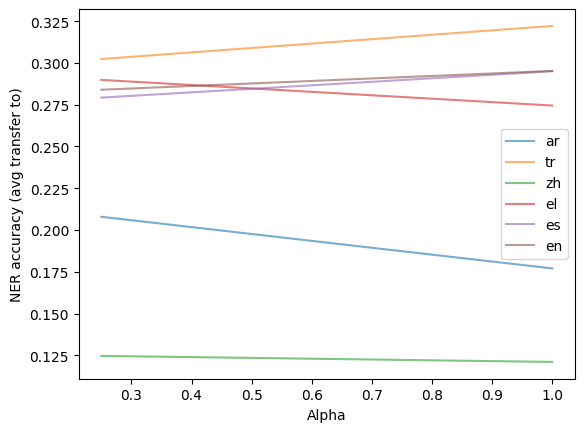

In [100]:
plt.figure()

for lang in languages:
    
    transfers_to = np.mean([ner_results[src_lang][lang] for src_lang in languages if lang != src_lang], axis=0)
    plt.plot(alphas, transfers_to, label=lang, alpha=0.6)
    
plt.xlabel("Alpha")
plt.ylabel("NER accuracy (avg transfer to)")
plt.legend()

(0.1, 0.4)

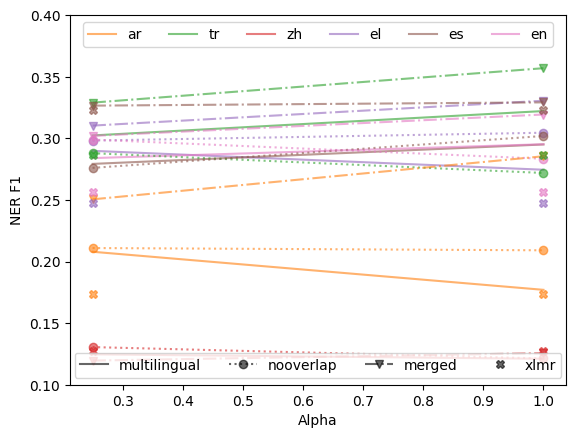

In [26]:
fig, axes = plt.subplots()

plot_baslines(axes,
             {lang: { baseline: np.mean([ner_results_baselines[src_lang][lang][baseline] 
                                         for src_lang in languages if lang != src_lang], axis=0)
                     for baseline in baselines}
              for lang in languages},
              "NER F1")

axes.set_ylim([0.1,0.4])

## All Results

<Figure size 640x480 with 0 Axes>

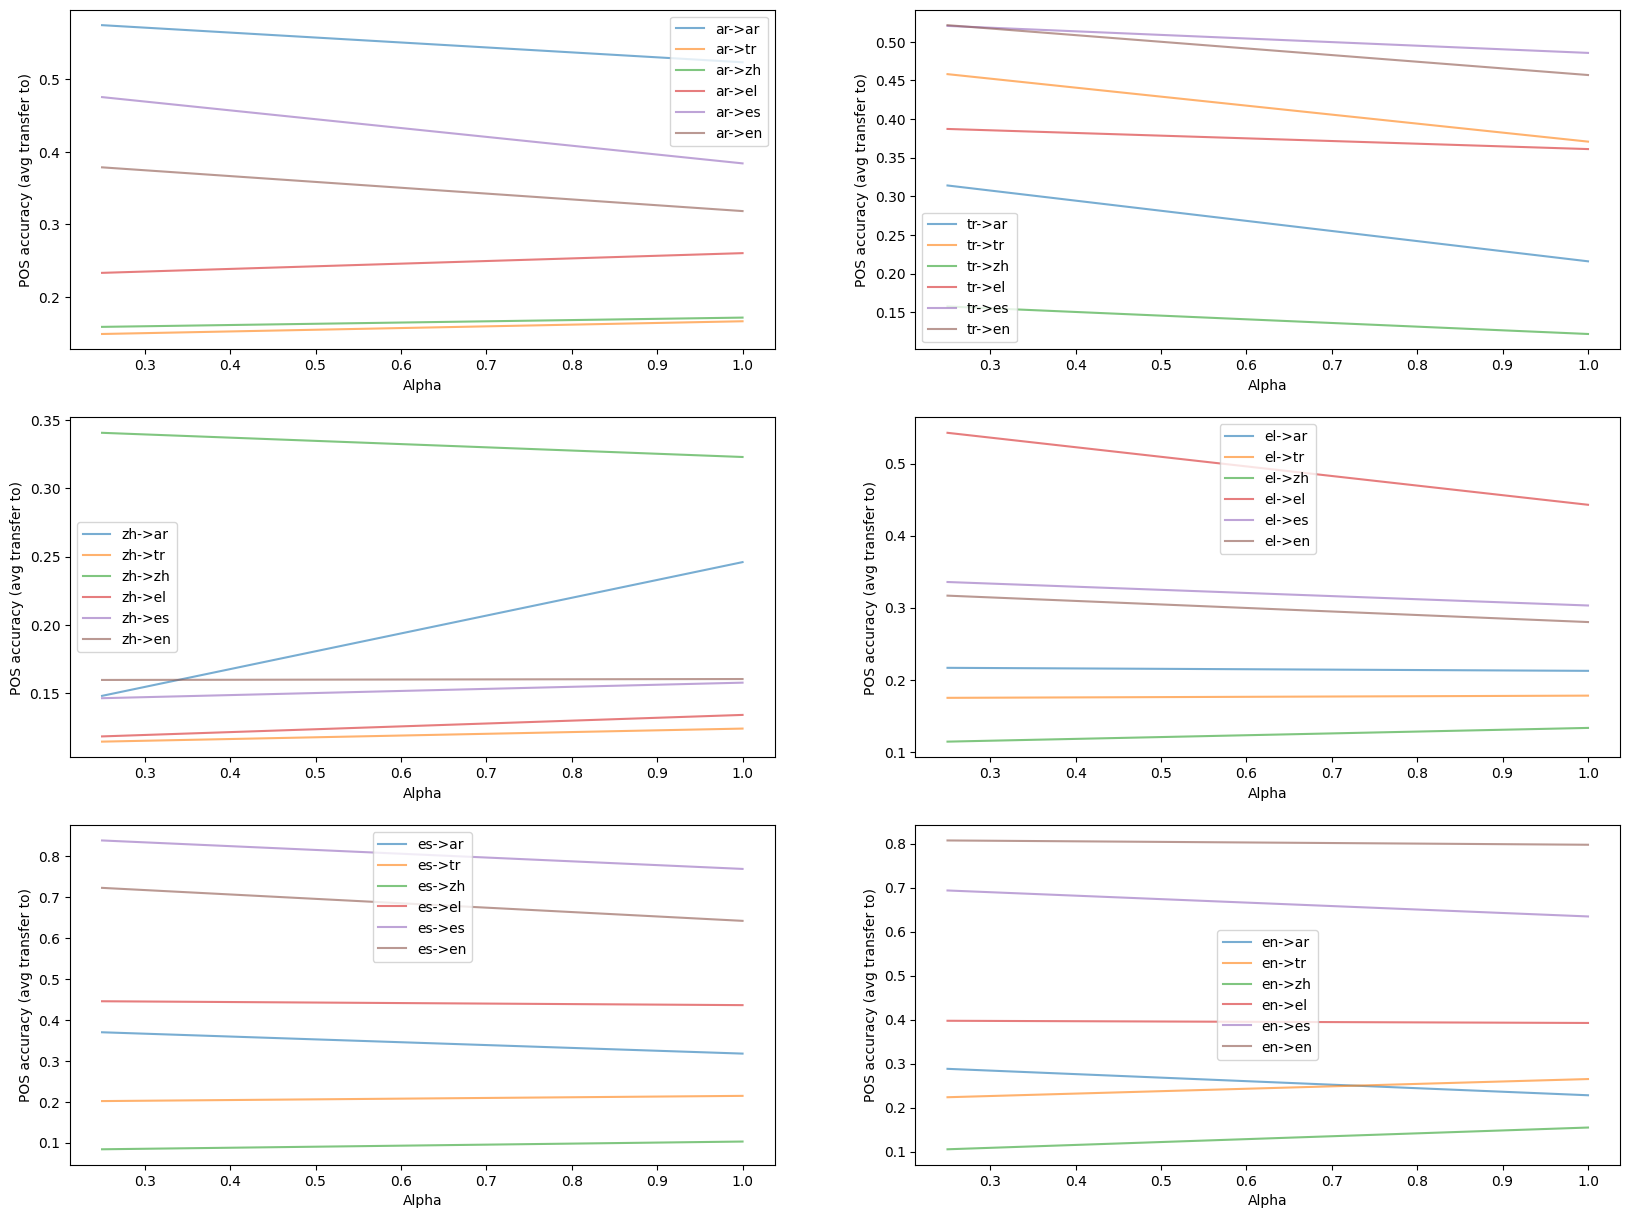

In [27]:
plt.figure()
fig, axs = plt.subplots(3, 2,figsize=(20, 15))
axs = axs.ravel()
for src_lang in languages:
    for ax_id, tgt_lang in enumerate(languages):
        #if src_lang != tgt_lang:
        transfers = pos_results[src_lang][tgt_lang]
        axs[ax_id].plot(alphas, transfers, label=f"{tgt_lang}->{src_lang}", alpha=0.6)

        axs[ax_id].set_xlabel("Alpha")
        axs[ax_id].set_ylabel("POS accuracy (avg transfer to)")
        axs[ax_id].legend()

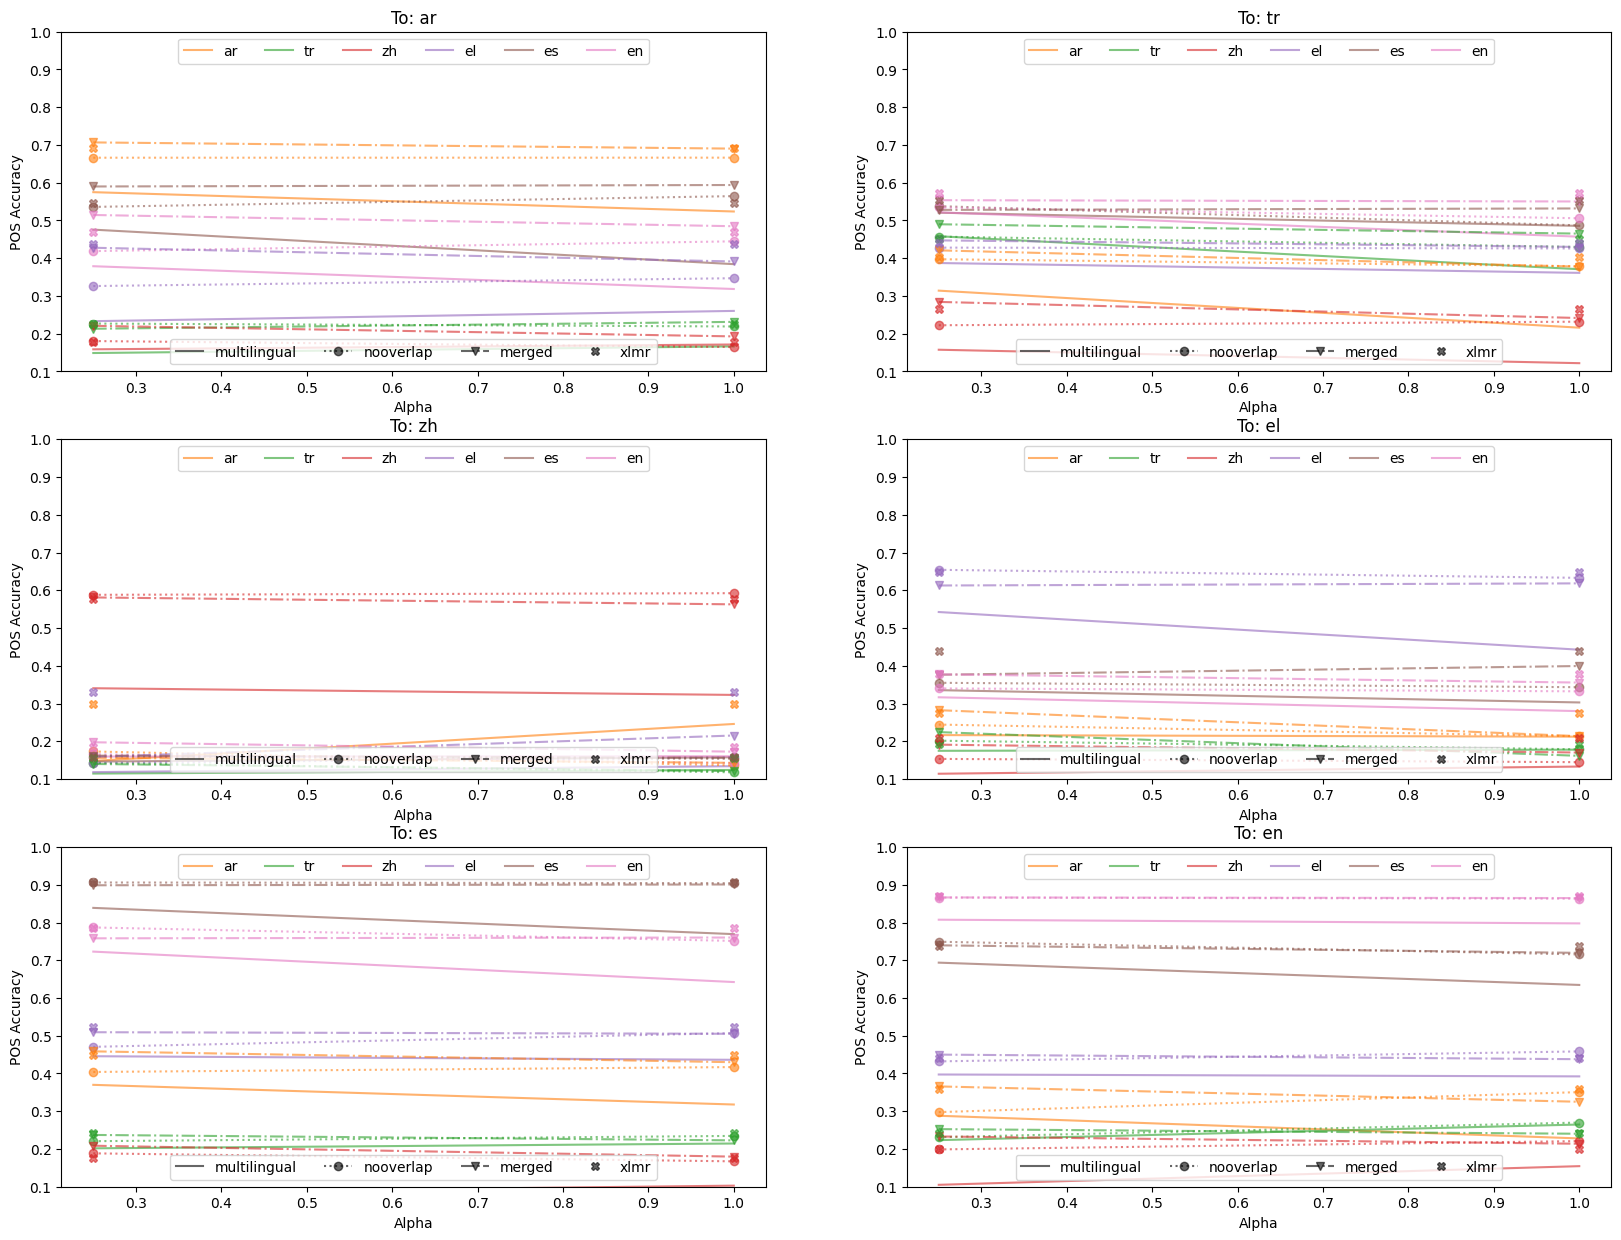

In [28]:


colors= ["C1", "C2", "C3", "C4", "C5", "C6"]
markers=['', 's', 'o']


fig, axes = plt.subplots(3, 2,figsize=(20, 15))
axes = axes.ravel()
for ax_id, tgt_lang in enumerate(languages):
    
    plot_baslines(axes[ax_id],
         {src_lang: { baseline: pos_results_baselines[src_lang][tgt_lang][baseline]
                 for baseline in baselines}
          for src_lang in languages},
          "POS Accuracy")
    axes[ax_id].set_ylim([0.1,1.0])
    axes[ax_id].set_title(f"To: {tgt_lang}")




<Figure size 640x480 with 0 Axes>

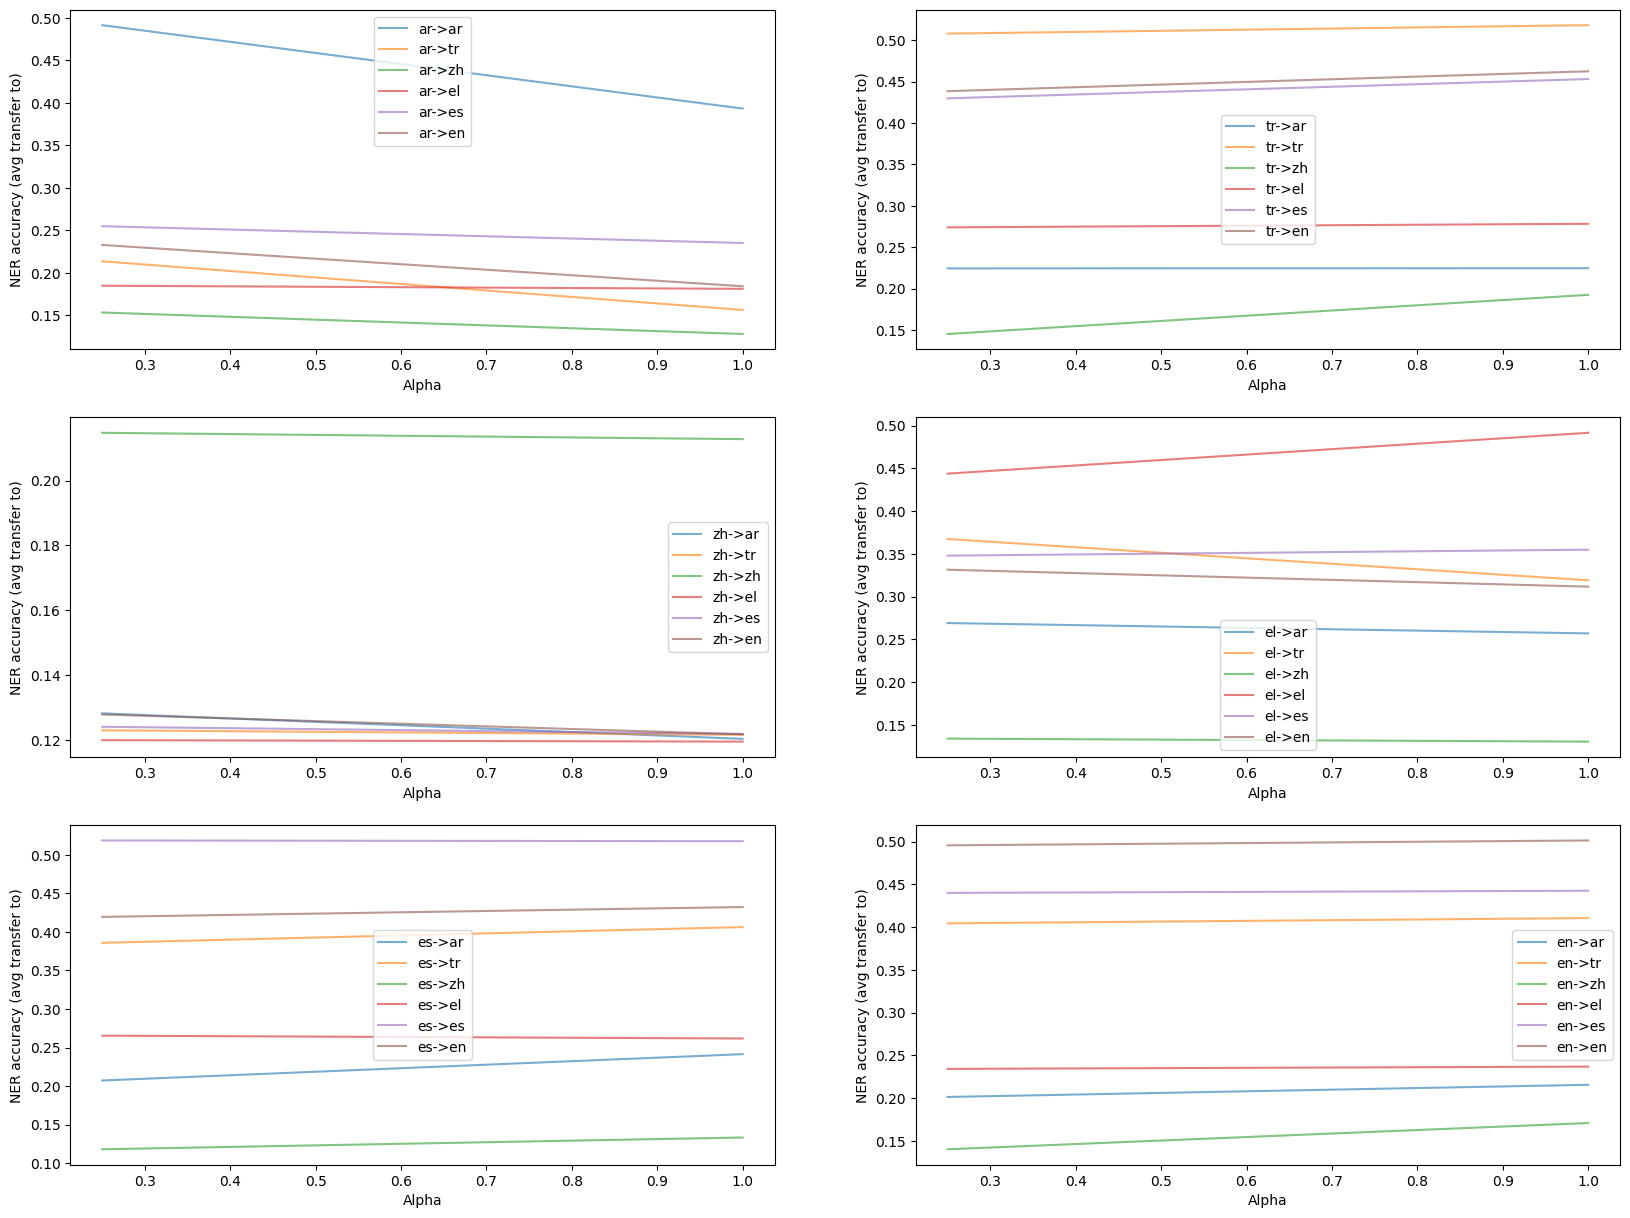

In [29]:
plt.figure()
fig, axs = plt.subplots(3, 2,figsize=(20, 15))
axs = axs.ravel()
for src_lang in languages:
    for ax_id, tgt_lang in enumerate(languages):
        #if src_lang != tgt_lang:
        transfers = ner_results[src_lang][tgt_lang]
        axs[ax_id].plot(alphas, transfers, label=f"{tgt_lang}->{src_lang}", alpha=0.6)

        axs[ax_id].set_xlabel("Alpha")
        axs[ax_id].set_ylabel("NER accuracy (avg transfer to)")
        axs[ax_id].legend()

**NER transfer increase with overlap for**

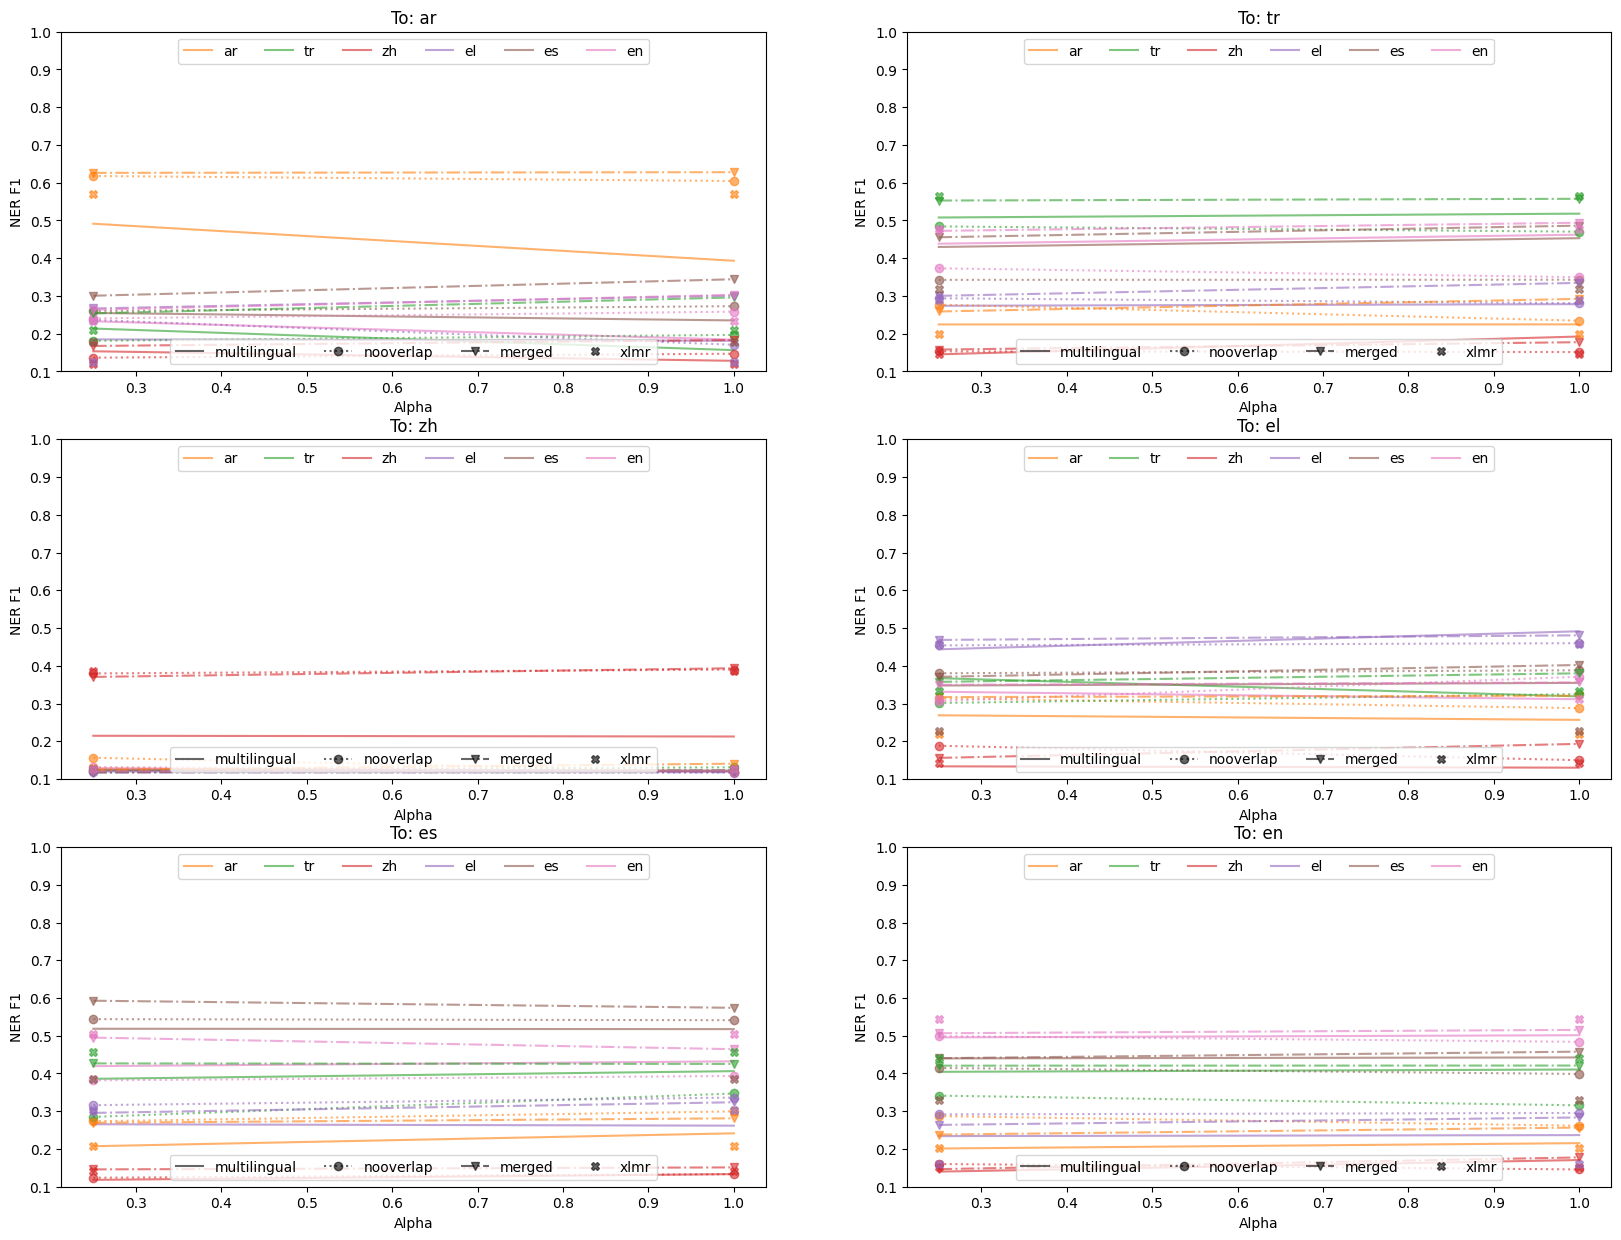

In [30]:


colors= ["C1", "C2", "C3", "C4", "C5", "C6"]
markers=['', 's', 'o']


fig, axes = plt.subplots(3, 2,figsize=(20, 15))
axes = axes.ravel()
for ax_id, tgt_lang in enumerate(languages):
    
    plot_baslines(axes[ax_id],
         {src_lang: { baseline: ner_results_baselines[src_lang][tgt_lang][baseline]
                 for baseline in baselines}
          for src_lang in languages},
          "NER F1")
    axes[ax_id].set_ylim([0.1,1.0])
    axes[ax_id].set_title(f"To: {tgt_lang}")